## Importing Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

## Data Loading

In [2]:
data = pd.read_csv('files/Customer_Segmentation.csv')
data

,first_name,last_name,title,gender,email,city,country,country_code,latitude,longitude,...,street_number,street_suffix,time_zone,company_name,department,job_title,language,university,linkedin_skill,ip_address
0,Priscella,Pollett,Honorable,Agender,ppollett0@foxnews.com,Sesheke,Zambia,ZM,-17.473886,24.295514,...,90004,Crossing,Africa/Lusaka,Omba,Support,Internal Auditor,Indonesian,University of Zambia,Lifestyle,129.60.144.253
1,Ana,Onge,Mr,Male,aonge1@fda.gov,Querecotillo,Peru,PE,-4.838304,-80.648215,...,9,Center,America/Lima,Cogidoo,Sales,Compensation Analyst,Fijian,Universidad Nacional de San Antonio Abad,Healthcare Industry,100.2.67.41
2,Butch,Rawls,Mrs,Male,brawls2@slideshare.net,Licupis,Peru,PE,-6.424052,-79.242648,...,5104,Point,America/Lima,Edgewire,Support,Health Coach II,Gujarati,Universidad Nacional de San Martín,Visual SVN,48.161.197.47
3,Ambros,Fairrie,Rev,Male,afairrie3@reuters.com,Yonghe,China,CN,36.759507,110.632006,...,8,Center,Asia/Harbin,Digitube,Support,General Manager,Belarusian,Fuzhou University,Nanofabrication,36.188.226.116
4,Gaylene,Titcomb,Honorable,Female,gtitcomb4@dyndns.org,Wang Yang,Thailand,TH,17.074088,104.449040,...,994,Trail,Asia/Bangkok,Quaxo,Engineering,Internal Auditor,Papiamento,Mahachulalongkorn Buddhist University,AQL,181.24.84.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50995,Madeleine,Beales,Mrs,Female,mbealesrn@dagondesign.com,Point Hill,Jamaica,JM,18.090238,-77.109170,...,500,Trail,America/Jamaica,Flashpoint,Marketing,Pharmacist,Dhivehi,"University of the West Indies, Mona",Capital Equipment,194.87.138.177
50996,Tiena,Linfoot,Mrs,Female,tlinfootro@reddit.com,Jiesheng,China,CN,22.713664,115.458167,...,5983,Trail,Asia/Shanghai,Skajo,Services,Graphic Designer,Arabic,Hubei University,PE,218.8.15.234
50997,Warren,Skeggs,Mr,Male,wskeggsrp@who.int,El Copey,Colombia,CO,10.148976,-73.960233,...,47,Parkway,America/Bogota,Mybuzz,Accounting,VP Sales,Kyrgyz,Conservatorio del Tolima,BPWin,94.174.254.81
50998,Collette,Aspy,Dr,Polygender,caspyrq@weather.com,Xiaping,China,CN,27.568278,117.562238,...,334,Parkway,Asia/Shanghai,Eire,Legal,Assistant Media Planner,Amharic,China Agriculture University East,Aquariums,239.103.209.178


## Data Analysis

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51000 entries, 0 to 50999
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   first_name      51000 non-null  object 
 1   last_name       51000 non-null  object 
 2   title           51000 non-null  object 
 3   gender          51000 non-null  object 
 4   email           51000 non-null  object 
 5   city            51000 non-null  object 
 6   country         51000 non-null  object 
 7   country_code    50966 non-null  object 
 8   latitude        51000 non-null  float64
 9   longitude       51000 non-null  float64
 10  phone           51000 non-null  object 
 11  street_address  51000 non-null  object 
 12  street_name     51000 non-null  object 
 13  street_number   51000 non-null  int64  
 14  street_suffix   51000 non-null  object 
 15  time_zone       51000 non-null  object 
 16  company_name    51000 non-null  object 
 17  department      51000 non-null 

In [4]:
data.describe()

,latitude,longitude,street_number
count,51000.000000,51000.000000,51000.000000
mean,24.785394,44.021854,11071.446275
std,24.522517,70.311057,23366.976562
min,-54.807950,-178.165510,0.000000
25%,7.590523,3.367186,21.000000
50%,30.826141,38.101695,439.000000
75%,44.303742,111.877499,6760.250000
max,78.221061,179.350460,99997.000000


In [5]:
data.nunique()

first_name         8416
last_name         31257
title                 6
gender                8
email             51000
city              24921
country             235
country_code        234
latitude          26324
longitude         25821
phone             50999
street_address    50463
street_name         500
street_number     15803
street_suffix        21
time_zone           330
company_name        383
department           12
job_title           195
language             97
university         6633
linkedin_skill     5976
ip_address        51000
dtype: int64

In [6]:
data.isna().sum()

first_name         0
last_name          0
title              0
gender             0
email              0
city               0
country            0
country_code      34
latitude           0
longitude          0
phone              0
street_address     0
street_name        0
street_number      0
street_suffix      0
time_zone          0
company_name       0
department         0
job_title          0
language           0
university         0
linkedin_skill     0
ip_address         0
dtype: int64

In [7]:
data.title.unique()

array(['Honorable', 'Mr', 'Mrs', 'Rev', 'Dr', 'Ms'], dtype=object)

In [8]:
data.job_title.unique()

array(['Internal Auditor', 'Compensation Analyst', 'Health Coach II',
       'General Manager', 'Mechanical Systems Engineer', 'Geologist II',
       'Electrical Engineer', 'Nurse Practicioner', 'Help Desk Operator',
       'Registered Nurse', 'Information Systems Manager',
       'Junior Executive', 'Staff Accountant II', 'Research Assistant II',
       'Systems Administrator IV', 'Civil Engineer',
       'Database Administrator II', 'Senior Financial Analyst',
       'Recruiting Manager', 'Food Chemist', 'VP Quality Control',
       'Analyst Programmer', 'Programmer I', 'Programmer Analyst II',
       'Desktop Support Technician', 'Environmental Tech',
       'Legal Assistant', 'Quality Engineer', 'Chief Design Engineer',
       'Account Coordinator', 'Business Systems Development Analyst',
       'Nurse', 'Community Outreach Specialist', 'Financial Advisor',
       'Database Administrator IV', 'Operator', 'Research Associate',
       'Dental Hygienist', 'Software Test Engineer IV',


In [9]:
data.language.unique()

array(['Indonesian', 'Fijian', 'Gujarati', 'Belarusian', 'Papiamento',
       'Portuguese', 'Dzongkha', 'Lao', 'Gagauz', 'Tamil', 'Macedonian',
       'Hiri Motu', 'Sotho', 'Guaraní', 'Telugu', 'Tetum', 'Māori',
       'Oriya', 'Swahili', 'German', 'Quechua', 'Bislama', 'Dutch',
       'Japanese', 'Romanian', 'Nepali', 'Tok Pisin', 'Tsonga', 'Arabic',
       'New Zealand Sign Language', 'Dhivehi', 'Kurdish', 'Bengali',
       'Albanian', 'Malay', 'Mongolian', 'Danish', 'Greek', 'Malayalam',
       'Estonian', 'Hindi', 'Zulu', 'Haitian Creole', 'Czech',
       'Irish Gaelic', 'Moldovan', 'Tajik', 'Aymara', 'Persian',
       'Yiddish', 'Assamese', 'Northern Sotho', 'Polish', 'Finnish',
       'Thai', 'Armenian', 'Maltese', 'English', 'Swedish', 'Korean',
       'Kyrgyz', 'Ndebele', 'Pashto', 'Punjabi', 'Icelandic', 'Dari',
       'Marathi', 'Croatian', 'Kashmiri', 'Norwegian', 'Kazakh',
       'Hungarian', 'Spanish', 'Lithuanian', 'Swati', 'Filipino', 'Azeri',
       'Luxembourgish', 'Am

In [10]:
data.department.unique()

array(['Support', 'Sales', 'Engineering', 'Marketing', 'Human Resources',
       'Accounting', 'Services', 'Business Development',
       'Product Management', 'Legal', 'Research and Development',
       'Training'], dtype=object)

In [11]:
data.gender.unique()

array(['Agender', 'Male', 'Female', 'Non-binary', 'Polygender',
       'Genderqueer', 'Genderfluid', 'Bigender'], dtype=object)

In [12]:
data.country.unique()

array(['Zambia', 'Peru', 'China', 'Thailand', 'Brazil', 'Zimbabwe',
       'Indonesia', 'Albania', 'Ukraine', 'Greece', 'Poland', 'Croatia',
       'Portugal', 'Philippines', 'Argentina', 'Pakistan',
       'United States', 'Slovenia', 'Norway', 'South Africa', 'Russia',
       'Vietnam', 'Democratic Republic of the Congo', 'Cuba', 'Botswana',
       'Myanmar', 'Japan', 'Egypt', 'Sweden', 'Georgia', 'Macedonia',
       'Mexico', 'France', 'Bosnia and Herzegovina', 'Sri Lanka',
       'Belarus', 'Guatemala', 'Honduras', 'Bulgaria', 'Afghanistan',
       'Papua New Guinea', 'Czech Republic', 'Canada', 'Serbia',
       'Bolivia', 'Kazakhstan', 'Ivory Coast', 'North Korea', 'Venezuela',
       'Benin', 'Finland', 'Iran', 'San Marino', 'Tunisia', 'Uganda',
       'Ireland', 'Djibouti', 'Colombia', 'Netherlands', 'Chad',
       'Malaysia', 'Panama', 'Spain', 'Switzerland', 'Dominican Republic',
       'New Zealand', 'Palau', 'Nigeria', 'Saudi Arabia', 'Nicaragua',
       'Palestinian Territo

## Data pre-processing

In [13]:
# Drop irrelevant columns
drop_cols = ["first_name", "last_name", "email", "ip_address", "linkedin_skill",'country_code', 'phone', 'street_address', 'street_name','city','street_number','university',
       'street_suffix', 'time_zone', 'company_name']
data = data.drop(columns=drop_cols, errors='ignore')

In [14]:
data

,title,gender,country,latitude,longitude,department,job_title,language
0,Honorable,Agender,Zambia,-17.473886,24.295514,Support,Internal Auditor,Indonesian
1,Mr,Male,Peru,-4.838304,-80.648215,Sales,Compensation Analyst,Fijian
2,Mrs,Male,Peru,-6.424052,-79.242648,Support,Health Coach II,Gujarati
3,Rev,Male,China,36.759507,110.632006,Support,General Manager,Belarusian
4,Honorable,Female,Thailand,17.074088,104.449040,Engineering,Internal Auditor,Papiamento
...,...,...,...,...,...,...,...,...
50995,Mrs,Female,Jamaica,18.090238,-77.109170,Marketing,Pharmacist,Dhivehi
50996,Mrs,Female,China,22.713664,115.458167,Services,Graphic Designer,Arabic
50997,Mr,Male,Colombia,10.148976,-73.960233,Accounting,VP Sales,Kyrgyz
50998,Dr,Polygender,China,27.568278,117.562238,Legal,Assistant Media Planner,Amharic


## Label Encoding

In [15]:
import pickle

# Ensure all categorical variables are encoded before scaling
categorical_cols = ["title", "gender", "country", "department", "job_title", "language"]
label_encoders = {}

for col in categorical_cols:
    if data[col].dtype == 'object':  # Encode only if the column is categorical
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col].astype(str))
        label_encoders[col] = le  # Store encoders for inverse transform if needed

# Check for any remaining non-numeric columns
non_numeric_cols = data.select_dtypes(exclude=[np.number]).columns
if len(non_numeric_cols) > 0:
    print("Warning: Non-numeric columns detected before scaling:", non_numeric_cols)

# Normalize numerical data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.select_dtypes(include=[np.number]))  # Scale only numeric columns


with open("files/Customer_segmentation_Encoder.pkl", "wb") as f:
    pickle.dump(label_encoders, f)

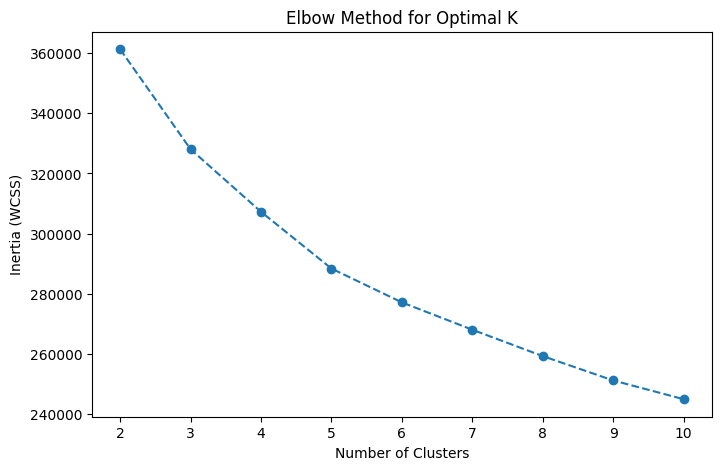

In [16]:
# Find optimal number of clusters using the Elbow Method
inertia = []
K_range = range(2, 11)  # Checking clusters from 2 to 10
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method for Optimal K")
plt.show()

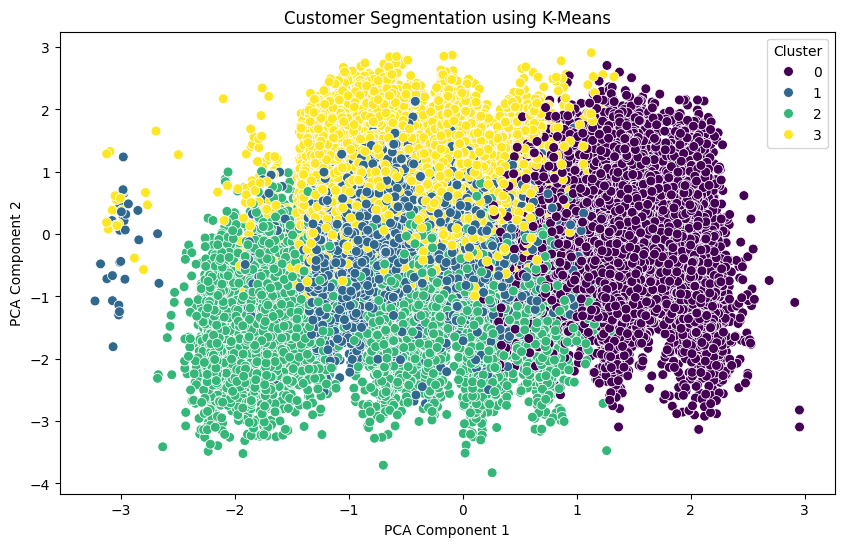

In [17]:
# Train K-Means with optimal K (assume K=4 based on elbow method)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
data['Cluster'] = kmeans.fit_predict(data_scaled)

# Reduce to 2D for visualization using PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
data["PCA1"], data["PCA2"] = data_pca[:, 0], data_pca[:, 1]

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data["PCA1"], y=data["PCA2"], hue=data['Cluster'], palette="viridis", s=50)
plt.title("Customer Segmentation using K-Means")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

In [18]:
# Save clustered data
data.to_csv("files/supervised_customer_segments.csv", index=False)

In [19]:
pickle.dump(kmeans,open("files/Customer_segmentation_model.pkl",'wb'))
pickle.dump(scaler,open("files/Customer_segmentation_Scaler.pkl",'wb'))
# Save PCA model
pickle.dump(pca, open("files/Customer_segmentation_PCA.pkl", 'wb'))

In [20]:
data

,title,gender,country,latitude,longitude,department,job_title,language,Cluster,PCA1,PCA2
0,1,0,233,-17.473886,24.295514,10,95,41,0,0.280073,-1.328421
1,2,5,166,-4.838304,-80.648215,8,44,25,2,0.334952,-2.366875
2,3,5,166,-6.424052,-79.242648,10,84,34,2,0.274907,-1.666102
3,5,5,42,36.759507,110.632006,10,76,8,3,-0.775334,0.642824
4,1,2,211,17.074088,104.449040,2,95,72,0,0.679748,0.274153
...,...,...,...,...,...,...,...,...,...,...,...
50995,3,2,103,18.090238,-77.109170,5,117,20,2,0.235001,-1.059353
50996,3,2,42,22.713664,115.458167,9,82,3,3,-1.144815,-0.013188
50997,2,5,45,10.148976,-73.960233,0,186,51,2,-0.512977,-0.317301
50998,0,7,42,27.568278,117.562238,4,23,2,1,-0.936624,-1.269708


In [21]:
# Function to predict a single customer
def predict_new_customer(single_customer):
    """
    Predicts the cluster for a single customer and visualizes the result.
    :param single_customer: Dictionary with customer data (must match original features)
    :return: Predicted cluster number

    """
    data = pd.read_csv("files/supervised_customer_segments.csv")
    single_df = pd.DataFrame([single_customer])
    
    # Encode categorical variables
    for col in categorical_cols:
        if col in single_df.columns and col in label_encoders:
            single_df[col] = label_encoders[col].transform(single_df[col].astype(str))
    
    # Scale numerical data
    single_scaled = scaler.transform(single_df.select_dtypes(include=[np.number]))
    
    # Predict cluster
    cluster = kmeans.predict(single_scaled)[0]
    cluster_name = f"Cluster {cluster+1}"
    
    # Plot the result
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=data["PCA1"], y=data["PCA2"], hue=data['Cluster'], palette="viridis", s=50, alpha=0.5)
    single_pca = pca.transform(single_scaled)
    plt.scatter(single_pca[:, 0], single_pca[:, 1], color='red', marker='X', s=200, label='New Customer')
    plt.title("Single Customer Segmentation")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend()
    plt.savefig("files/new_customer_result.png")
    plt.show()
    
    return cluster_name

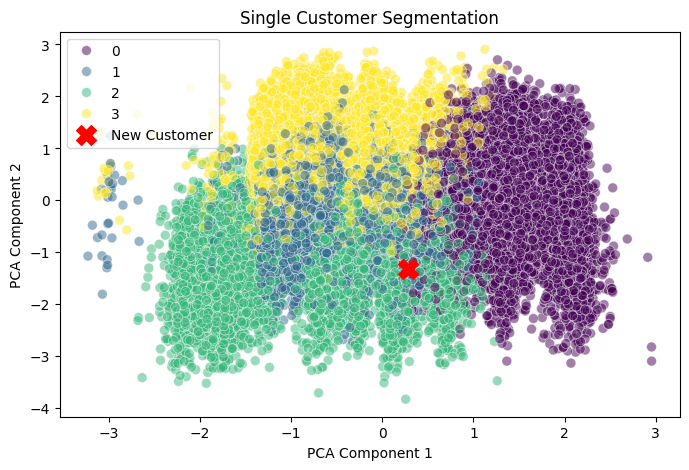

Cluster 1


In [22]:
# Example single customer prediction
single_customer = single_customer = {
    "title": "Honorable",
    "gender": "Agender",
    "country": "Zambia",
    "latitude": -17.473886,
    "longitude": 24.295514,
    "department": "Support",
    "job_title": "Internal Auditor",
    "language": "Indonesian"
}  

predicted_cluster = predict_new_customer(single_customer)
print(predicted_cluster)

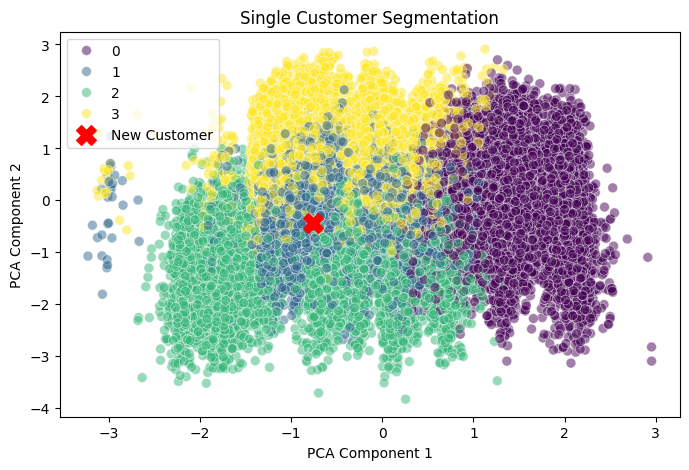

Cluster 2


In [23]:
single_customer = single_customer = {
    "title": "Mr",
    "gender": "Male",
    "country": "Zambia",
    "latitude": -47.473886,
    "longitude": 94.295514,
    "department": "Training",
    "job_title": "Software Engineer III",
    "language": "Gujarati"
}  

predicted_cluster = predict_new_customer(single_customer)
print(predicted_cluster)

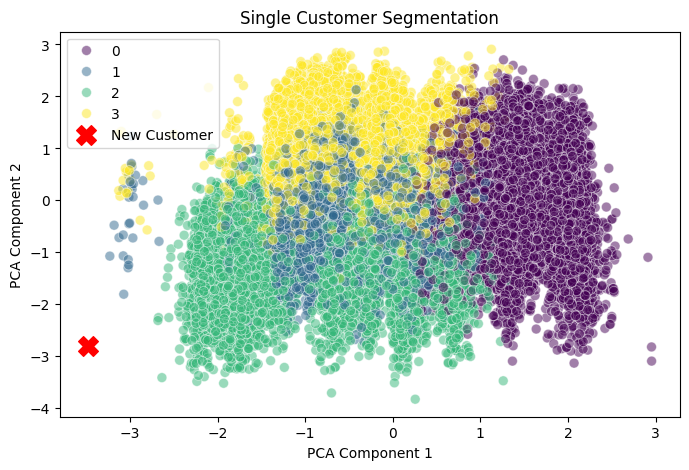

Cluster 3


In [24]:

single_customer = single_customer = {
    "title": "Dr",
    "gender": "Male",
    "country": "Egypt",
    "latitude": -97.473886,
    "longitude": 4.295514,
    "department": "Legal",
    "job_title": "Help Desk Operator",
    "language": "French"
}  

predicted_cluster = predict_new_customer(single_customer)
print(predicted_cluster)

*****************************************